In [87]:
import pandas as pd
import matplotlib as plt 
import seaborn as sns 
import numpy as np

In [88]:
df_merged = pd.read_csv('/Users/pierreloyal/Desktop/Bootcamp CA/us_flight_2023/df_merged.csv')

In [89]:
df_sampled_1 = df_merged.sample(n=1000000, random_state=42)
columns_to_keep = ['Airline', 'Dep_Airport', 'Arr_Airport', 'DepTime_label', 'Distance_type', 'Dep_Delay_Type', 'Month', 'Day_Of_Week']
df_sampled = df_sampled_1[columns_to_keep]

In [90]:
# Display unique values in the 'Dep_Delay_Type' column
unique_values = df_sampled['Dep_Delay_Type'].unique()
print(unique_values)

['Medium >15min' 'Hight >60min' 'Low <5min']


In [91]:
import pandas as pd

# Assuming df_sampled is your original dataset

# Display unique values in the 'Dep_Delay_Type' column
unique_values = df_sampled['Dep_Delay_Type'].unique()
print(unique_values)

# Adjust the sampling based on the correct unique values
low_sample = df_sampled[df_sampled['Dep_Delay_Type'] == 'Low <5min'].sample(n=150000, random_state=42)
medium = df_sampled[df_sampled['Dep_Delay_Type'] == 'Medium >15min']
high = df_sampled[df_sampled['Dep_Delay_Type'] == 'Hight >60min']

# Combine the sampled 'Low <5min' with all 'Medium >15min' and the correct 'Hight >60min' category
df_ml_1 = pd.concat([low_sample, medium, high])

# Display the counts of each category in the new dataset
print(df_ml_1['Dep_Delay_Type'].value_counts())

# Save the new dataset to a new variable
df_ml_1.reset_index(drop=True, inplace=True)



['Medium >15min' 'Hight >60min' 'Low <5min']
Low <5min        150000
Medium >15min    129881
Hight >60min      67638
Name: Dep_Delay_Type, dtype: int64


In [92]:
columns_to_keep = ['Airline', 'Dep_Airport', 'Arr_Airport', 'DepTime_label', 'Distance_type', 'Dep_Delay_Type', 'Month', 'Day_Of_Week']
df_ml = df_ml_1[columns_to_keep]

# Trial 1 unbalanced

Epoch 1/17


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6400/6400 ━━━━━━━━━━━━━━━━━━━━ 3s 488us/step - accuracy: 0.7999 - loss: 1.2012 - val_accuracy: 0.8037 - val_loss: 0.6221
Epoch 2/17
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 3s 470us/step - accuracy: 0.8030 - loss: 0.6233 - val_accuracy: 0.8037 - val_loss: 0.6210
Epoch 3/17
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 3s 473us/step - accuracy: 0.8031 - loss: 0.6224 - val_accuracy: 0.8037 - val_loss: 0.6210
Epoch 4/17
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 3s 468us/step - accuracy: 0.8026 - loss: 0.6233 - val_accuracy: 0.8037 - val_loss: 0.6216
Epoch 5/17
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 3s 460us/step - accuracy: 0.8016 - loss: 0.6255 - val_accuracy: 0.8037 - val_loss: 0.6213
Epoch 6/17
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 3s 446us/step - accuracy: 0.8025 - loss: 0.6233 - val_accuracy: 0.8037 - val_loss: 0.6200
Epoch 7/17
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 3s 443us/step - accuracy: 0.8020 - loss: 0.6239 - val_accuracy: 0.8037 - val_loss: 0.6201
Epoch 8/17
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 3s 454us/step - accuracy: 0.8019 - loss: 0.62

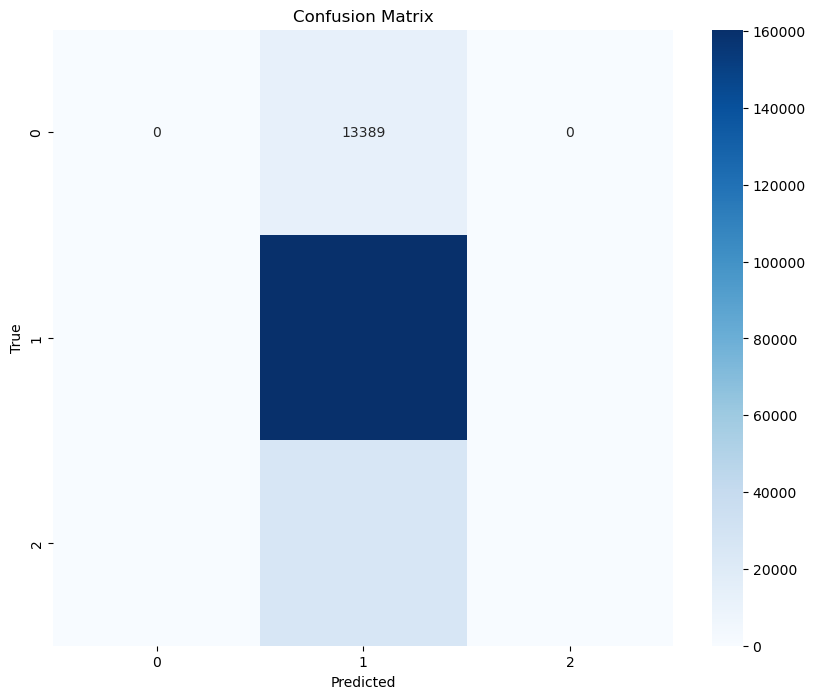

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     13389
           1       0.80      1.00      0.89    160405
           2       0.00      0.00      0.00     26206

    accuracy                           0.80    200000
   macro avg       0.27      0.33      0.30    200000
weighted avg       0.64      0.80      0.71    200000



/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report


X = df_sampled.drop(columns=['Dep_Delay_Type']) 
y = df_sampled['Dep_Delay_Type']  

# Encode categorical features
categorical_features = ['Airline', 'Dep_Airport', 'Arr_Airport', 'DepTime_label', 'Distance_type']
encoder = LabelEncoder()

for feature in categorical_features:
    X[feature] = encoder.fit_transform(X[feature])

# Encode target and convert to categorical:
y = encoder.fit_transform(y)
y = to_categorical(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train[['Day_Of_Week', 'Month']] = scaler.fit_transform(X_train[['Day_Of_Week', 'Month']])
X_test[['Day_Of_Week', 'Month']] = scaler.transform(X_test[['Day_Of_Week', 'Month']])

# Build the neural network model with the best hyperparameters
model = Sequential()
model.add(Dense(197, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.23465942250029376))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model with the specified optimizer
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Train the model with the specified epochs and batch size
history = model.fit(X_train, y_train, epochs=17, batch_size=100, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_true_classes, y_pred_classes)
print("Classification Report:\n", class_report)



## Correction

In [99]:
from keras.layers import LeakyReLU

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(512, activation=LeakyReLU(alpha=0.1), kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(256, activation=LeakyReLU(alpha=0.1), kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(128, activation=LeakyReLU(alpha=0.1), kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(len(np.unique(y_resampled)), activation='softmax'))

optimizer = RMSprop(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [102]:
from sklearn.ensemble import BaggingClassifier
from scikeras.wrappers import KerasClassifier

def create_model():
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(512, activation=LeakyReLU(alpha=0.1), kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation=LeakyReLU(alpha=0.1), kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation=LeakyReLU(alpha=0.1), kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(len(np.unique(y_resampled)), activation='softmax'))

    optimizer = RMSprop(learning_rate=0.001)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

keras_model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=64, verbose=0)

bagging = BaggingClassifier(base_estimator=keras_model, n_estimators=10, random_state=42)
bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

## TRIAL 2 Balanced


Epoch 1/17


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2225/2225 ━━━━━━━━━━━━━━━━━━━━ 2s 577us/step - accuracy: 0.4231 - loss: 2.2125 - val_accuracy: 0.4341 - val_loss: 1.0473
Epoch 2/17
2225/2225 ━━━━━━━━━━━━━━━━━━━━ 1s 481us/step - accuracy: 0.4304 - loss: 1.0500 - val_accuracy: 0.4343 - val_loss: 1.0471
Epoch 3/17
2225/2225 ━━━━━━━━━━━━━━━━━━━━ 1s 483us/step - accuracy: 0.4308 - loss: 1.0488 - val_accuracy: 0.4341 - val_loss: 1.0467
Epoch 4/17
2225/2225 ━━━━━━━━━━━━━━━━━━━━ 1s 479us/step - accuracy: 0.4312 - loss: 1.0498 - val_accuracy: 0.4343 - val_loss: 1.0471
Epoch 5/17
2225/2225 ━━━━━━━━━━━━━━━━━━━━ 1s 538us/step - accuracy: 0.4315 - loss: 1.0495 - val_accuracy: 0.4345 - val_loss: 1.0474
Epoch 6/17
2225/2225 ━━━━━━━━━━━━━━━━━━━━ 1s 488us/step - accuracy: 0.4302 - loss: 1.0495 - val_accuracy: 0.4343 - val_loss: 1.0470
Epoch 7/17
2225/2225 ━━━━━━━━━━━━━━━━━━━━ 1s 493us/step - accuracy: 0.4305 - loss: 1.0493 - val_accuracy: 0.4345 - val_loss: 1.0468
Epoch 8/17
2225/2225 ━━━━━━━━━━━━━━━━━━━━ 1s 537us/step - accuracy: 0.4300 - loss: 1.04

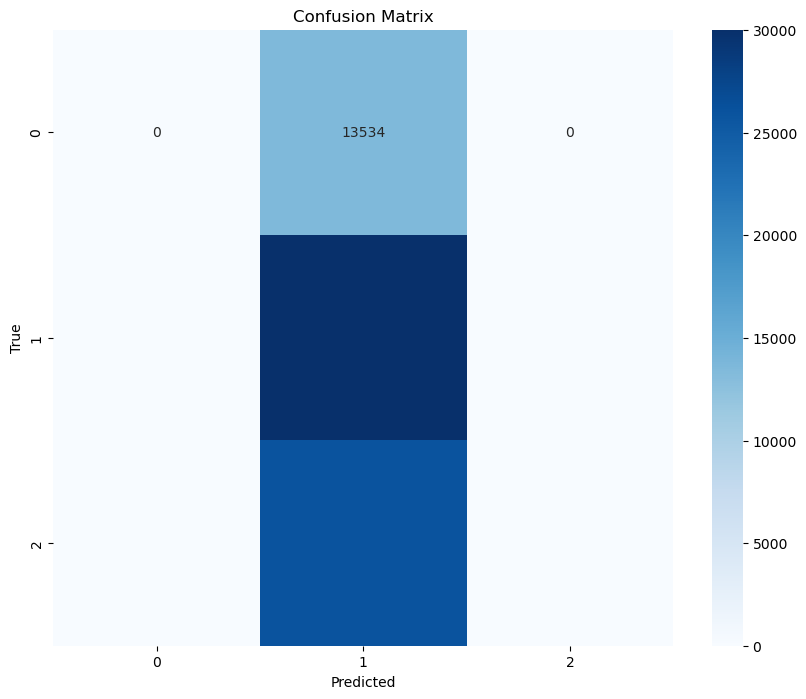

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     13534
           1       0.43      1.00      0.60     30022
           2       0.67      0.00      0.00     25948

    accuracy                           0.43     69504
   macro avg       0.37      0.33      0.20     69504
weighted avg       0.44      0.43      0.26     69504



/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report


X = df_ml.drop(columns=['Dep_Delay_Type']) 
y = df_ml['Dep_Delay_Type']  

# Encode categorical features
categorical_features = ['Airline', 'Dep_Airport', 'Arr_Airport', 'DepTime_label', 'Distance_type']
encoder = LabelEncoder()

for feature in categorical_features:
    X[feature] = encoder.fit_transform(X[feature])

# Encode target and convert to categorical
y = encoder.fit_transform(y)
y = to_categorical(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train[['Day_Of_Week', 'Month']] = scaler.fit_transform(X_train[['Day_Of_Week', 'Month']])
X_test[['Day_Of_Week', 'Month']] = scaler.transform(X_test[['Day_Of_Week', 'Month']])


model = Sequential()
model.add(Dense(197, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.23465942250029376))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=17, batch_size=100, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_true_classes, y_pred_classes)
print("Classification Report:\n", class_report)



## Trial 3

In [73]:
class_counts = df_sampled['Dep_Delay_Type'].value_counts()
print(class_counts)


Low <5min        802481
Medium >15min    129881
Hight >60min      67638
Name: Dep_Delay_Type, dtype: int64
